## data visualization

- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

movies = pd.read_csv('./Data/blockbusters.csv')

movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
#or
# for i in range(len(movies)):
#     movies.loc[i,'worldwide_gross'] = float(movies.loc[i,'worldwide_gross'].replace('$','').replace(',',''))

In [39]:
movies.head(2)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018


## a single numeric variable
1. histogram


Text(0.5, 1.0, 'worldwide gross histogram')

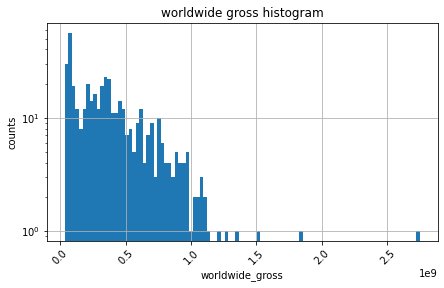

In [72]:
# 单个变量
movies['worldwide_gross'].hist(bins=100,xlabelsize=10,xrot=45,figsize=(7,4),log=True)
# or用plt plt.hist(movies['worldwide_gross'].values,bins=100,log=True, range = [0,200]) range用于限定x轴
plt.xlabel("worldwide_gross")
plt.ylabel("counts")
plt.title("worldwide gross histogram")

# sns
# sns.histplot(movies['worldwide_gross'], kde=True, log_scale=True)
# plt.title("worldwide gross histogram")

Text(0.5, 1.0, 'length histogram')

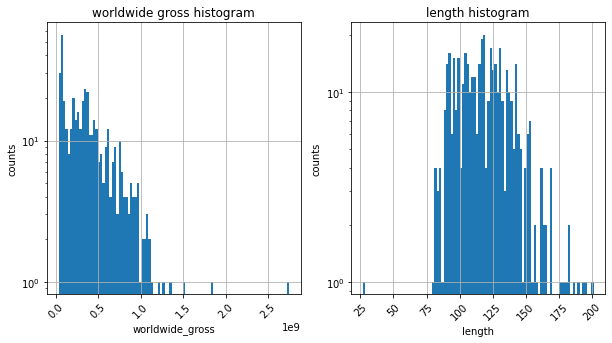

In [74]:
# 两个变量放在一张图里
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 

movies['worldwide_gross'].hist(bins=100,xlabelsize=10,xrot=45,figsize=(10,5),log=True,ax=axes[0]) # 开启log
#or axes[0].hist(movies['worldwide_gross'].values,bins=100,...)
axes[0].set_xlabel("worldwide_gross")
axes[0].set_ylabel("counts")
axes[0].set_title("worldwide gross histogram")

movies['length'].hist(bins=100,xlabelsize=10,xrot=45,figsize=(10,5),log=True,ax=axes[1])
axes[1].set_xlabel("length")
axes[1].set_ylabel("counts")
axes[1].set_title("length histogram")

Text(0.5, 1.0, 'length histogram')

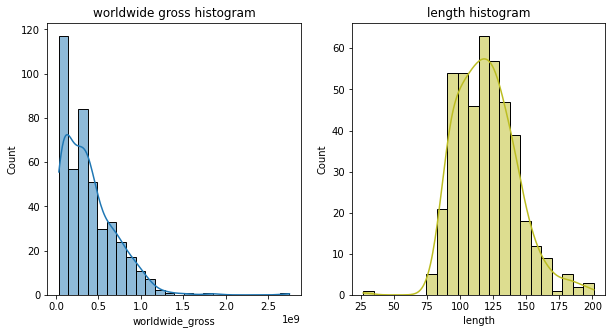

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 

sns.histplot(movies['worldwide_gross'], kde=True, alpha=0.5, label='worldwide_gross',ax=axes[0])
# sns.distplot(movies['worldwide_gross'], hist=True, label='worldwide_gross',ax=axes[0]) # y轴是密度，不是count
axes[0].set_title("worldwide gross histogram")

sns.histplot(movies['length'],kde=True, alpha=0.5, label='length', color='C8',ax=axes[1])
axes[1].set_title("length histogram")

2. boxplot/violinplot

Text(0.5, 1.0, 'Worldwide gross revenue')

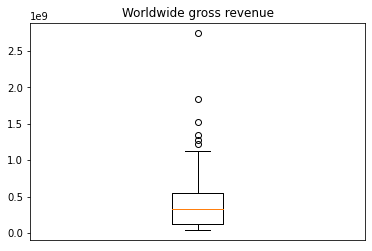

In [78]:
plt.boxplot(movies['worldwide_gross'])
# or sns.boxplot(data=movies['worldwide_gross'])
plt.xticks([]) # disable x tick
# plt.xticks([1], ['xsiJ'])
plt.title('Worldwide gross revenue')

Text(0.5, 0.98, 'worldwide_gross')

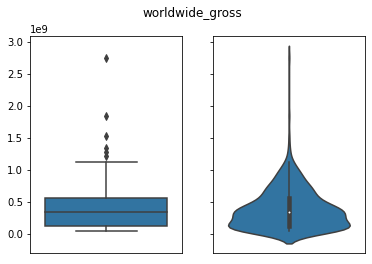

In [82]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

sns.boxplot(data=movies['worldwide_gross'], ax=axes[0])
axes[0].set_xticks([]) # disable

sns.violinplot(data=movies['worldwide_gross'], ax=axes[1])
axes[1].set_xticks([]) 

plt.suptitle('worldwide_gross')

## two numeric variables

1. scatter plot: not useful when the number of datapoints is very large, as it becomes hard to interpret it. 可以改用sns.jointplot

Text(0.5, 1.0, 'scatter plot of Worldwide gross revenue and its IMDB rating')

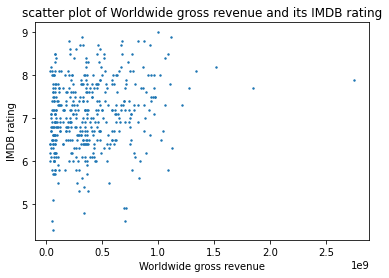

In [84]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'],s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')
plt.title('scatter plot of Worldwide gross revenue and its IMDB rating')

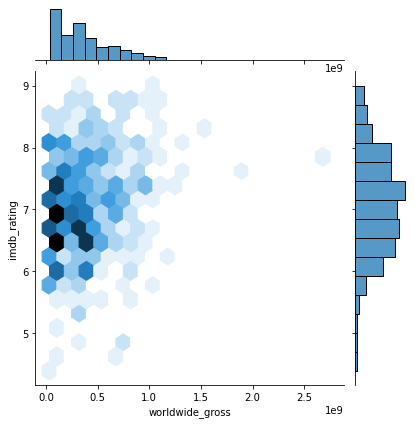

In [85]:
sns.jointplot(movies['worldwide_gross'], movies['imdb_rating'], kind="hex")
# kind="kde"时有等高线，kind="reg"时有回归线

## two variables, one numeric and one categorical

- Let's consider the five most prevalent genres, and examine the revenue
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html)

1. series.plot(kin='bar') / pd.plot(kin='bar')

In [122]:
# prepare top_genre_df
top_genre = list(movies['Main_Genre'].value_counts().sort_values(ascending=False).index[:5])
top_genre_df = movies.loc[movies['Main_Genre'].isin(top_genre)]

Text(0.5, 1.0, 'average worldwide gross for top5 genres')

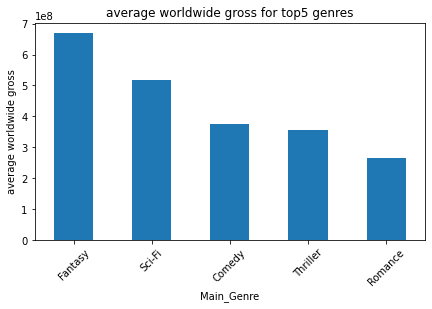

In [124]:
# draw with series.plot(kind="bar")
# note that 只要x与y的index相同 pd.plot(kind="bar",x="xxx", y="yyy",figsize=(10,7),log=True,alpha=0.5,color="olive") will also work
avrg_gross = top_genre_df.groupby("Main_Genre")["worldwide_gross"].mean().sort_values(ascending=False) # series
avrg_gross.plot(kind="bar",figsize=(7,4))
plt.xticks(rotation=45)
plt.ylabel('average worldwide gross')
plt.title("average worldwide gross for top5 genres")

2. sns.barplot()

<AxesSubplot:xlabel='Main_Genre', ylabel='worldwide_gross'>

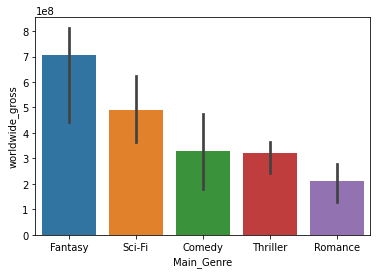

In [136]:
sns.barplot(x="Main_Genre", y="worldwide_gross", data=top_genre_df, estimator=np.mean, # estimator默认为np.mean，可以改为np.median
            order=list(top_genre_df.groupby("Main_Genre")["worldwide_gross"].mean().sort_values(ascending=False).index)) 
plt.xticks(rotation=90) 
# 也可使用sns.boxplot(x="Main_Genre", y="worldwide_gross", data=top_genre_df, order=..)
# 也可使用sns.violinplot(x="Main_Genre", y="worldwide_gross", data=top_genre_df, order=..)

## Visualizing uncertainty: calculate CI & plot errorbar
average yearly worldwide gross revenue, together with the upper and lower bound (bootstrap to create confidence intervals)


In [144]:
# This is a helper bootstrapping function you can use in this exercise to obtain 95% confidence
# intervals around the estimated average.

# Input: data: your array; nbr_draws:实验多少次(e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)
    # 重复采样nbr_draws次（1000）
    for n in range(nbr_draws):
        # 随机选出len(data)个data中的数（可重复）-->（有放回的）
        indices = np.random.randint(0, len(data), len(data)) # [low, high). If high is None (the default), then results are from [0, low) 
        data_tmp = data[indices] 
        # 计算忽略NaN值的数组平均值
        means[n] = np.nanmean(data_tmp) 
    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)] # np.nanpercentile()找到一组数的分位数值

In [137]:
movies.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018


In [160]:
avg_each_year = movies.groupby(['year'])['worldwide_gross'].mean().rename("average") # series
lower_err_each_year = movies.groupby(['year'])['worldwide_gross'].apply(lambda x: bootstrap_CI(x,1000)[0]).rename("lower") # series
upper_err_each_year = movies.groupby(['year'])['worldwide_gross'].apply(lambda x: bootstrap_CI(x,1000)[1]).rename("upper") # series

stats_by_year = pd.concat([avg_each_year,lower_err_each_year,upper_err_each_year], axis=1)

# # or a better way:
# stats_by_year = movies.groupby(['year']).apply(lambda x: pd.Series({
#         'average_worldwide_gross': x['worldwide_gross'].mean(),
#         'lower_err_worldwide_gross': bootstrap_CI(x['worldwide_gross'], 1000)[0],
#         'upper_err_worldwide_gross': bootstrap_CI(x['worldwide_gross'], 1000)[1]
#     }))  # x代表sub df

In [164]:
stats_by_year.head(2)

,average,lower,upper
year,,,
1975,4.096674e+07,3.688835e+07,4.564215e+07
1976,6.642076e+07,5.429749e+07,8.096860e+07


Text(0, 0.5, 'Worldwide gross revenue')

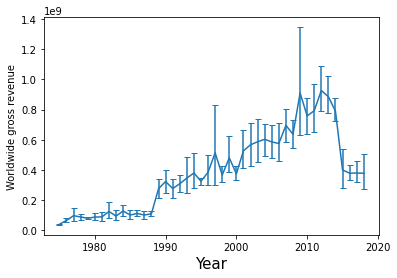

In [166]:
# plot with errorbars 

plt.errorbar(stats_by_year.index, stats_by_year.average,
             yerr = [stats_by_year.average - stats_by_year.lower, 
                     stats_by_year.upper - stats_by_year.average], # yerr若只指定一维数组，则±对称；现在传入二维，则上下浮动不等
             capsize= 3)
plt.xlabel('Year',size=15)
plt.ylabel('Worldwide gross revenue')

Text(0, 0.5, 'Worldwide gross revenue')

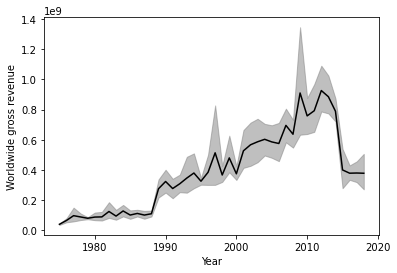

In [167]:
# another visual: filled plot

plt.fill_between(stats_by_year.index, stats_by_year.lower, stats_by_year.upper, alpha=0.5, color='gray')
plt.plot(stats_by_year.average, color = 'black')
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

## panels

展示每个类型电影时长的histogram

In [168]:
# Calculate stats by genre here

stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({'length': x['length'].values})) # 每一个元素都是series

In [169]:
stats_by_genre.head(2)

,length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."


Text(0, 0.6, 'Number of movies')

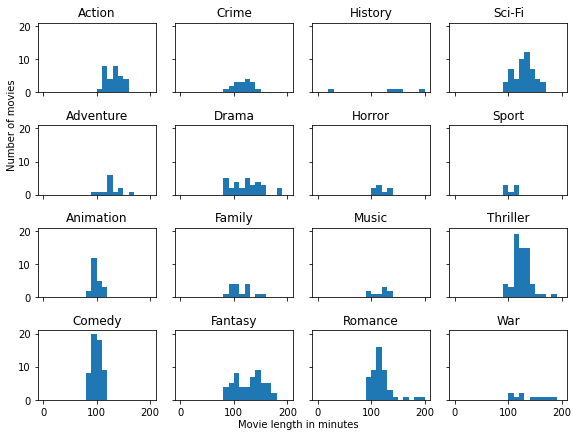

In [172]:
# make 4x4 panel
fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)
for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)] # 4指列数
    sbplt.hist(stats_by_genre.iloc[i].values, range = [0,200],bins = 20) # stats_by_genre.iloc[i].values返回ndarray，range指x轴
    sbplt.set_title(stats_by_genre.index[i])
fig.tight_layout()

fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)

## Heatmaps
各studios都拍什么类的电影（个数） 

<AxesSubplot:xlabel='studio', ylabel='Main_Genre'>

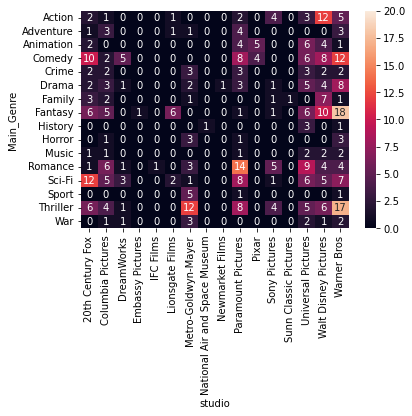

In [173]:
df2 = pd.crosstab(movies['Main_Genre'],movies['studio']) # Main_Genre是index，studio是column
sns.heatmap(df2, annot=True, vmin = 0, vmax = 20)

哪种电影票房总数最高？

<AxesSubplot:xlabel='Genre_2', ylabel='Main_Genre'>

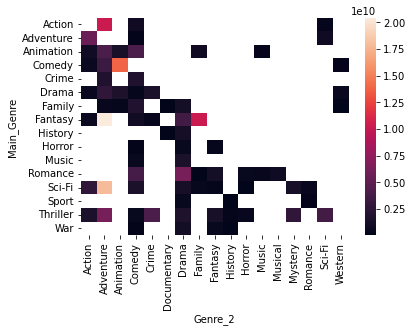

In [195]:
df3 = pd.crosstab(movies['Main_Genre'],movies['Genre_2'], values = movies['worldwide_gross'],
                  margins=False, aggfunc='sum')

sns.heatmap(df3, annot=False)

## Visualizing skewed distributions (Power Law)

In [211]:
commune_pop = pd.read_excel('./Data/communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[commune_pop['commune'].str.startswith('......')].copy() # name.startswith('......')返回Boolean series；.copy()创建新表，使原来表不受影响

In [212]:
pop_per_commune.head(2)

,commune,population_Jan,birth_alive,death,natrual_increase,arrivals,departure,migratory_balance,divergence_statistic,population_Dec,variation_num,variation_ratio
3,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
4,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227


power law with log plot 

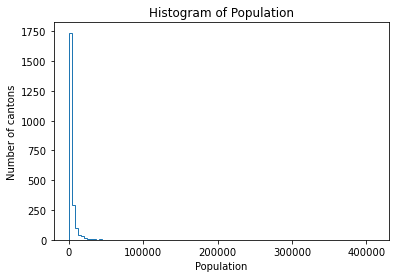

In [213]:
#plot out the histogram of population Counts in December
plt.hist(pop_per_commune.population_Dec,bins=100,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()

power law with only y log

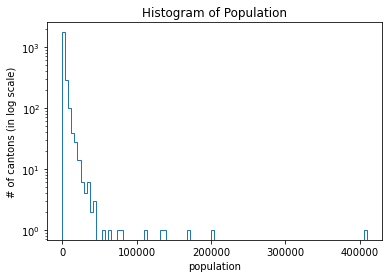

In [214]:
# with bins=100
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step') # 只有y轴是log；array_100[0]表示y(100,)；array_100[1]表示x(101,) 边界点，当然多1个数
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

power law with both axis log, small bins sizes might introduce artifacts

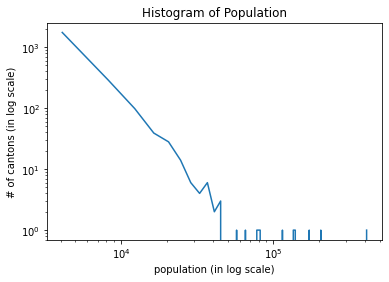

In [215]:
# log-log
plt.loglog(array_100[1][1:],array_100[0]) # x:array_100[1][1:]  y:array_100[0]
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

Since small bins sizes might introduce artifacts, we change to a bigger bin number

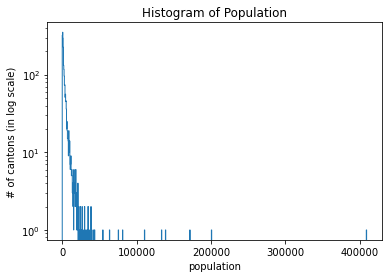

In [216]:
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

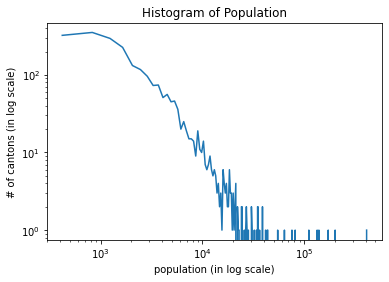

In [217]:
plt.loglog(array_1000[1][1:],array_1000[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

Now it looks better!

Another great way: complementary cumulative representation (y-axis represents the number of data points with values greater than y) (ccdf) 03-page31-32

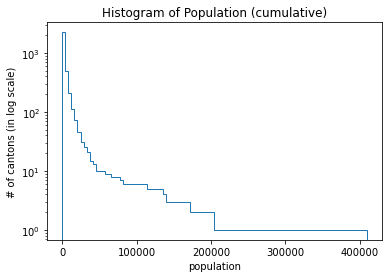

In [218]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

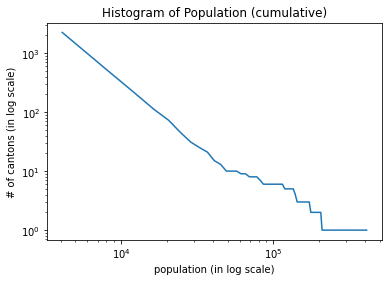

In [219]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()
# ccdf of a power law is also a power law --> log-log 图是直线